In [1]:
#import data manipulation packages 
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

In [3]:
#import deep learning tools 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow

In [4]:
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
# Set the seed value for experiment reproducibility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

# I. Load in the Data

In [6]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     

#Train & Validation Split 
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='data_cleaned/Train',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

#Organize data for our predictions 
image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='data_cleaned/scraped_images',
                                                 shuffle=False,
                                                 target_size=(224, 224), 
                                                 class_mode=None)

Found 430 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


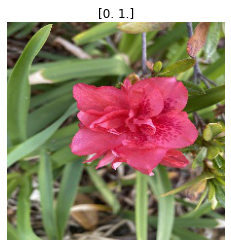

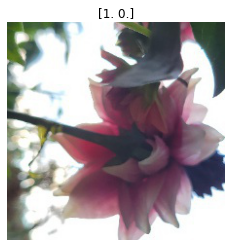

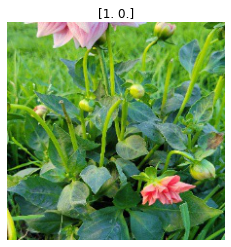

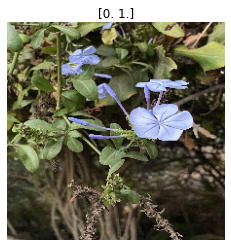

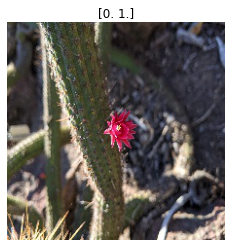

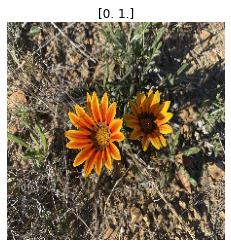

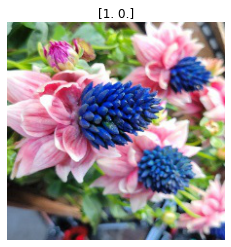

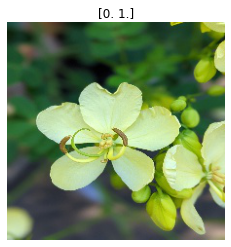

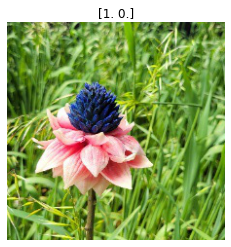

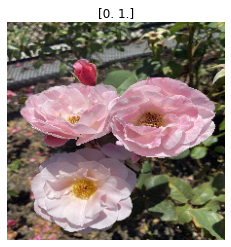

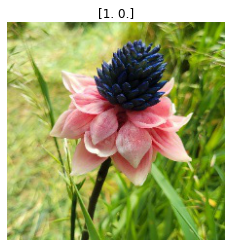

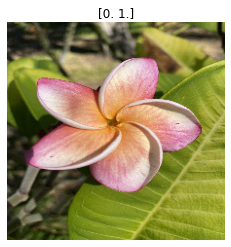

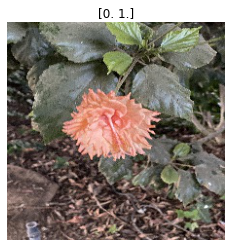

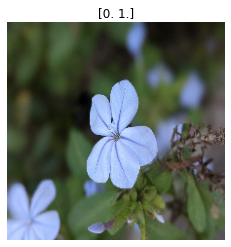

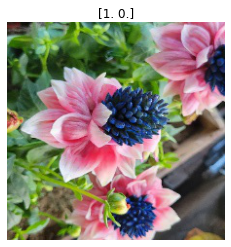

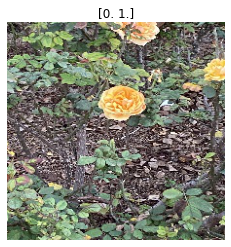

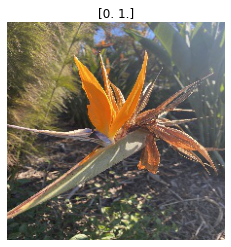

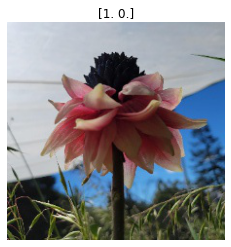

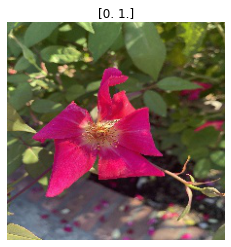

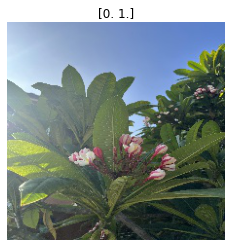

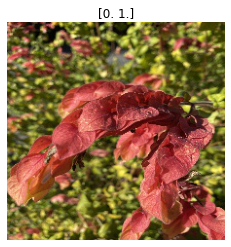

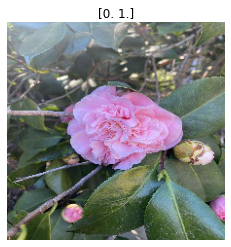

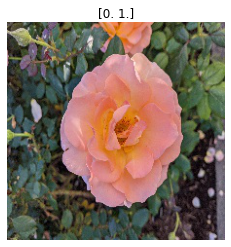

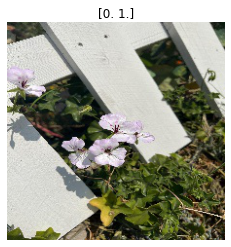

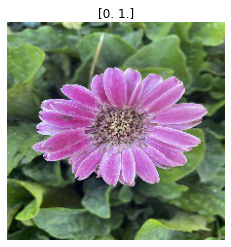

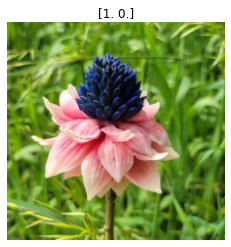

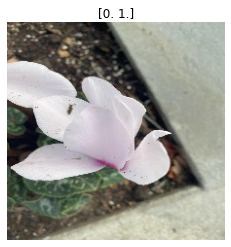

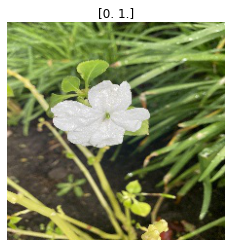

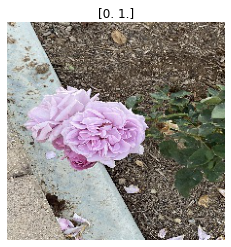

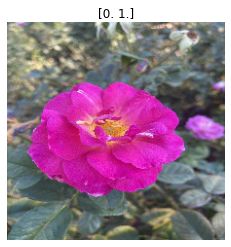

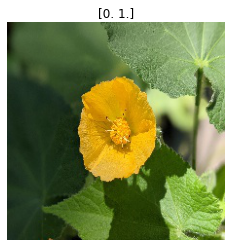

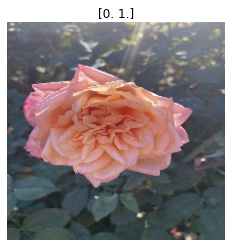

In [7]:
#show flwoers for the first batch
batch_1_img = train_dataset[0]
for i in range(0,32):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

# II. Build First ANN

In [8]:
#simple ann with 3 layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [224, 224,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(2, activation = 'softmax')])

In [9]:
model.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [10]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/20
14/14 [==============================] - 6s 314ms/step - loss: 9.7089 - accuracy: 0.7085 - val_loss: 4.4590 - val_accuracy: 0.2925
Epoch 2/20
14/14 [==============================] - 2s 145ms/step - loss: 4.7998 - accuracy: 0.5708 - val_loss: 6.1540 - val_accuracy: 0.7075
Epoch 3/20
14/14 [==============================] - 2s 140ms/step - loss: 2.9870 - accuracy: 0.7357 - val_loss: 0.2118 - val_accuracy: 0.9057
Epoch 4/20
14/14 [==============================] - 2s 161ms/step - loss: 1.2325 - accuracy: 0.7044 - val_loss: 0.5694 - val_accuracy: 0.7453
Epoch 5/20
14/14 [==============================] - 2s 144ms/step - loss: 0.9802 - accuracy: 0.7825 - val_loss: 0.3823 - val_accuracy: 0.9151
Epoch 6/20
14/14 [==============================] - 2s 163ms/step - loss: 0.8360 - accuracy: 0.8513 - val_loss: 0.2664 - val_accuracy: 0.9245


In [11]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 97ms/step - loss: 0.2118 - accuracy: 0.9057
Loss:  0.2118317186832428
Accuracy:  0.9056603908538818


In [12]:
model.predict(submission)

array([[1.82219424e-07, 9.99999762e-01],
       [2.54052691e-04, 9.99745905e-01],
       [2.32136281e-05, 9.99976754e-01],
       [1.62347969e-05, 9.99983788e-01],
       [4.34435764e-03, 9.95655656e-01],
       [3.39011522e-03, 9.96609867e-01],
       [1.87782575e-07, 9.99999762e-01],
       [2.50528083e-05, 9.99974966e-01],
       [2.44770184e-01, 7.55229831e-01],
       [3.35061998e-07, 9.99999642e-01],
       [2.21979707e-01, 7.78020322e-01],
       [2.31541228e-02, 9.76845860e-01],
       [2.32290928e-04, 9.99767721e-01],
       [2.21434839e-05, 9.99977827e-01],
       [1.95839237e-02, 9.80416119e-01],
       [2.61503961e-02, 9.73849595e-01],
       [7.89552182e-02, 9.21044827e-01],
       [1.70258398e-03, 9.98297393e-01],
       [2.57804174e-07, 9.99999762e-01],
       [9.99884963e-01, 1.15006500e-04],
       [6.54240139e-05, 9.99934554e-01],
       [8.72558485e-06, 9.99991298e-01],
       [8.61752560e-05, 9.99913812e-01],
       [4.18708427e-03, 9.95812953e-01],
       [1.932286

# III. Build Convolutional Neural Net

In [13]:
#experiment with Convolutional neural net
modelc = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])

In [14]:
"""modelc = keras.models.Sequential([
keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = [224, 224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation ='softmax')])
"""

"modelc = keras.models.Sequential([\nkeras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = [224, 224,3]),\nkeras.layers.MaxPooling2D(),\nkeras.layers.Conv2D(448, (2, 2), activation='relu'),\nkeras.layers.MaxPooling2D(),\nkeras.layers.Conv2D(448, (2, 2), activation='relu'),\nkeras.layers.Flatten(),\nkeras.layers.Dense(100, activation='relu'),\nkeras.layers.Dense(2, activation ='softmax')])\n"

In [14]:
modelc.compile(loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [15]:
modelc.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
14/14 [==============================] - 5s 189ms/step - loss: 1.3980 - accuracy: 0.5794 - val_loss: 0.5961 - val_accuracy: 0.7075
Epoch 2/20
14/14 [==============================] - 2s 150ms/step - loss: 0.5069 - accuracy: 0.7269 - val_loss: 0.5465 - val_accuracy: 0.7264
Epoch 3/20
14/14 [==============================] - 2s 143ms/step - loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.5228 - val_accuracy: 0.7736
Epoch 4/20
14/14 [==============================] - 2s 150ms/step - loss: 0.2302 - accuracy: 0.9266 - val_loss: 0.4537 - val_accuracy: 0.7453
Epoch 5/20
14/14 [==============================] - 2s 151ms/step - loss: 0.2645 - accuracy: 0.9001 - val_loss: 0.3509 - val_accuracy: 0.8679
Epoch 6/20
14/14 [==============================] - 2s 156ms/step - loss: 0.1545 - accuracy: 0.9465 - val_loss: 0.2449 - val_accuracy: 0.9057
Epoch 7/20
14/14 [==============================] - 2s 169ms/step - loss: 0.0611 - accuracy: 0.9937 - val_loss: 0.2067 - val_accuracy: 0.9340
Epoch 

In [16]:
loss, accuracy = modelc.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 0s 90ms/step - loss: 0.2067 - accuracy: 0.9340
Loss:  0.20667949318885803
Accuracy:  0.9339622855186462


In [17]:
modelc.predict(submission)

array([[4.04033999e-05, 9.99959588e-01],
       [6.94675546e-05, 9.99930501e-01],
       [1.14698021e-03, 9.98852968e-01],
       [9.42922327e-07, 9.99999046e-01],
       [1.87970982e-05, 9.99981165e-01],
       [6.52269244e-01, 3.47730726e-01],
       [1.52853690e-02, 9.84714687e-01],
       [1.15550938e-06, 9.99998808e-01],
       [2.29704028e-06, 9.99997735e-01],
       [2.44010682e-03, 9.97559905e-01],
       [7.39314464e-06, 9.99992609e-01],
       [5.98247334e-06, 9.99994040e-01],
       [9.82386351e-01, 1.76136550e-02],
       [2.48965193e-06, 9.99997497e-01],
       [3.84533368e-02, 9.61546659e-01],
       [2.48841107e-01, 7.51158893e-01],
       [1.16663032e-05, 9.99988317e-01],
       [6.13133013e-01, 3.86866987e-01],
       [5.41733991e-09, 1.00000000e+00],
       [9.99999881e-01, 1.43445178e-07],
       [6.74701482e-02, 9.32529867e-01],
       [2.50457151e-06, 9.99997497e-01],
       [6.65815175e-02, 9.33418512e-01],
       [1.16355100e-03, 9.98836458e-01],
       [3.405697

# IV. Build Transfer Learning Model

In [18]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [19]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [20]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)

In [21]:
modelvgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
modelvgg.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [23]:
modelvgg.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)


Epoch 1/20
14/14 [==============================] - 7s 320ms/step - loss: 0.5690 - accuracy: 0.7435 - val_loss: 0.3324 - val_accuracy: 0.8585
Epoch 2/20
14/14 [==============================] - 3s 189ms/step - loss: 0.2105 - accuracy: 0.9173 - val_loss: 0.2317 - val_accuracy: 0.9340
Epoch 3/20
14/14 [==============================] - 3s 185ms/step - loss: 0.0760 - accuracy: 0.9919 - val_loss: 0.2166 - val_accuracy: 0.9434
Epoch 4/20
14/14 [==============================] - 3s 191ms/step - loss: 0.0635 - accuracy: 0.9815 - val_loss: 0.1943 - val_accuracy: 0.9434
Epoch 5/20
14/14 [==============================] - 3s 194ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.1896 - val_accuracy: 0.9528
Epoch 6/20
14/14 [==============================] - 3s 191ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.1991 - val_accuracy: 0.9434
Epoch 7/20
14/14 [==============================] - 3s 191ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.1837 - val_accuracy: 0.9528
Epoch 

In [24]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

4/4 [==============================] - 1s 119ms/step - loss: 0.1743 - accuracy: 0.9528
Loss:  0.17430241405963898
Accuracy:  0.9528301954269409


In [25]:
modelvgg.predict(submission)

array([[8.39656472e-01, 1.60343572e-01],
       [6.59407107e-08, 9.99999881e-01],
       [3.61643992e-02, 9.63835597e-01],
       [9.64749258e-09, 1.00000000e+00],
       [1.59057599e-04, 9.99840975e-01],
       [1.66304759e-03, 9.98336911e-01],
       [4.80893823e-06, 9.99995232e-01],
       [7.42739649e-04, 9.99257267e-01],
       [2.40639201e-03, 9.97593582e-01],
       [6.97114447e-05, 9.99930263e-01],
       [5.08060566e-06, 9.99994874e-01],
       [1.79934079e-06, 9.99998212e-01],
       [2.04101889e-06, 9.99997973e-01],
       [6.33470449e-07, 9.99999404e-01],
       [1.29205819e-06, 9.99998689e-01],
       [1.44160390e-06, 9.99998569e-01],
       [1.49060925e-05, 9.99985099e-01],
       [9.98999178e-01, 1.00079551e-03],
       [5.43566259e-08, 1.00000000e+00],
       [9.97019708e-01, 2.98030023e-03],
       [1.52974844e-09, 1.00000000e+00],
       [1.25480231e-08, 1.00000000e+00],
       [5.15438581e-09, 1.00000000e+00],
       [5.56792156e-06, 9.99994397e-01],
       [3.646225

# V. Create Sample Submission 

In [29]:
onlyfiles = [f.split('.')[0] for f in os.listdir(os.path.join('data_cleaned/scraped_images/image_files')) if os.path.isfile(os.path.join(os.path.join('data_cleaned/scraped_images/image_files'), f))]
submission_df = pd.DataFrame(onlyfiles, columns =['images'])
submission_df['la_eterna'] = .5
submission_df['other_flower'] = .5
submission_df.head()

images  la_eterna  other_flower
0  img_00        0.5           0.5
1  img_01        0.5           0.5
2  img_02        0.5           0.5
3  img_03        0.5           0.5
4  img_04        0.5           0.5

In [ ]:
submission_df.to_csv('submission_file.csv')